In [2]:
import pandas as pd
import numpy as np

In [24]:
apr = pd.read_csv("appraisal.csv", on_bad_lines='skip')
usefull_view = apr.groupby(["brand", "model", "version"]).nunique().sort_values("id", ascending=False)
usefull_view = usefull_view.head(300)
useful_names = set(usefull_view.index.map("_".join))
apr["name"] = apr["brand"] + "_" +  apr["model"] + "_" +  apr["version"]
uapr = apr[apr["name"].apply(lambda x: x in useful_names)]
uapr = uapr[uapr["sell_price"] < 1e5]
uapr

,id,brand,model,version,year,km,sell_price,purchase_price,name
0,24,YAMAHA,X-MAX,250,2018.0,40000.0,4990.0,NaN,YAMAHA_X-MAX_250
3,37,YAMAHA,YZF,R1,2005.0,50000.0,4690.0,NaN,YAMAHA_YZF_R1
5,40,KAWASAKI,Z,900,2018.0,22800.0,6590.0,NaN,KAWASAKI_Z_900
7,59,KAWASAKI,VN,900 CLASSIC,2009.0,35000.0,4990.0,NaN,KAWASAKI_VN_900 CLASSIC
17,99,HONDA,[*AJ*] CBR,600 RR,2019.0,10000.0,8190.0,NaN,HONDA_[*AJ*] CBR_600 RR
...,...,...,...,...,...,...,...,...,...
10155,55556,PEUGEOT,TWEET,125,2018.0,10000.0,1590.0,NaN,PEUGEOT_TWEET_125
10157,55582,HONDA,CBF,600 S,2007.0,10000.0,4390.0,NaN,HONDA_CBF_600 S
10158,55591,PIAGGIO,X EVO,125,2011.0,20000.0,1790.0,NaN,PIAGGIO_X EVO_125
10159,55613,YAMAHA,X-MAX,125,2018.0,20000.0,3990.0,NaN,YAMAHA_X-MAX_125


In [29]:

features = pd.DataFrame({
    "name": uapr["name"].astype("category"),
    "brand": uapr["brand"].astype("category"),
    "model": uapr["model"].astype("category"),
    "version": uapr["version"].astype("category"),
    "age": 2022 - uapr["year"],
    "km": uapr["km"],
    "log_km": np.log(uapr["km"]),
})

y = uapr["sell_price"]



In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, y, random_state=42)

In [61]:
from autosklearn.regression import AutoSklearnRegressor
amodel = AutoSklearnRegressor(
    time_left_for_this_task=300,
    ensemble_size=10,
    n_jobs=4,
)

In [ ]:
amodel.fit(
    X_train,
    y_train,
    dataset_name="Motorbikes"
)

<AxesSubplot:title={'center':'Train scatter | mse=570.111'}, xlabel='predicted', ylabel='true'>

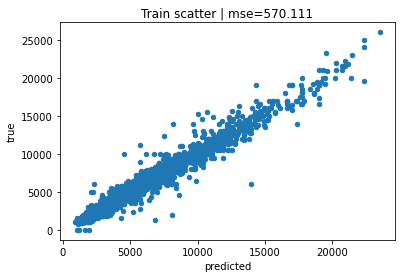

In [63]:
errors = pd.DataFrame({"predicted": amodel.predict(X_train), "true": y_train})
errors["err"] = errors["true"] - errors["predicted"]
mse = ((errors["err"]**2).sum()/len(errors))**0.5
errors.plot.scatter("predicted", "true", title=f"Train scatter | mse={mse:.3f}")

<AxesSubplot:title={'center':'Test scatter | mse=988.762'}, xlabel='predicted', ylabel='true'>

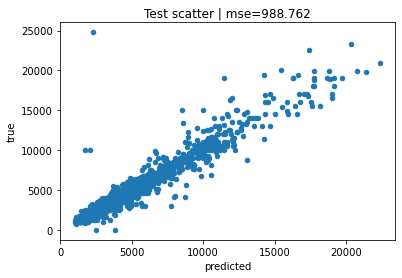

In [64]:
errors = pd.DataFrame({"predicted": amodel.predict(X_test), "true": y_test})
errors["err"] = errors["true"] - errors["predicted"]
mse = ((errors["err"]**2).sum()/len(errors))**0.5
errors.plot.scatter("predicted", "true", title=f"Test scatter | mse={mse:.3f}")

In [65]:
amodel.show_models()

{54: {'model_id': 54,
  'rank': 1,
  'cost': 0.05819591450606154,
  'ensemble_weight': 0.1,
  'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice at 0x7fdd0e6056f0>,
  'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice at 0x7fdcfc4b2b30>,
  'regressor': <autosklearn.pipeline.components.regression.RegressorChoice at 0x7fdcfd636860>,
  'sklearn_regressor': HistGradientBoostingRegressor(l2_regularization=1.1616651474858123e-05,
                                learning_rate=0.020807600931828166, max_iter=512,
                                max_leaf_nodes=54, min_samples_leaf=1,
                                n_iter_no_change=9, random_state=1,
                                validation_fraction=None, warm_start=True)},
 39: {'model_id': 39,
  'rank': 2,
  'cost': 0.05936157045691337,
  'ensemble_weight': 0.3,
  'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPrep

### First experiment

<AxesSubplot:title={'center':'Train scatter | mse=583.668'}, xlabel='predicted', ylabel='true'>

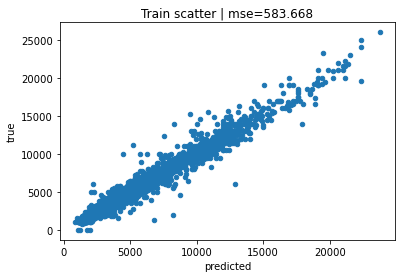

In [55]:
errors = pd.DataFrame({"predicted": amodel.predict(X_train), "true": y_train})
errors["err"] = errors["true"] - errors["predicted"]
mse = ((errors["err"]**2).sum()/len(errors))**0.5
errors.plot.scatter("predicted", "true", title=f"Train scatter | mse={mse:.3f}")

<AxesSubplot:title={'center':'Test scatter | mse=990.779'}, xlabel='predicted', ylabel='true'>

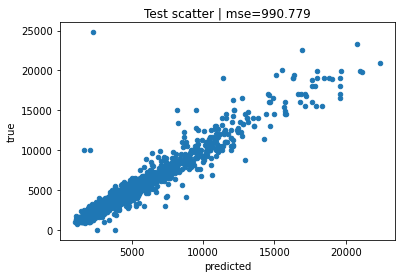

In [54]:
errors = pd.DataFrame({"predicted": amodel.predict(X_test), "true": y_test})
errors["err"] = errors["true"] - errors["predicted"]
mse = ((errors["err"]**2).sum()/len(errors))**0.5
errors.plot.scatter("predicted", "true", title=f"Test scatter | mse={mse:.3f}")


In [57]:
amodel.show_models()

{50: {'model_id': 50,
  'rank': 1,
  'cost': 0.057859239984817123,
  'ensemble_weight': 0.4,
  'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice at 0x7fdd0e709ff0>,
  'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice at 0x7fdd0e684340>,
  'regressor': <autosklearn.pipeline.components.regression.RegressorChoice at 0x7fdd0cee3730>,
  'sklearn_regressor': HistGradientBoostingRegressor(l2_regularization=0.04388425107184446,
                                learning_rate=0.02301347081242202, max_iter=512,
                                max_leaf_nodes=45, min_samples_leaf=12,
                                n_iter_no_change=12, random_state=1,
                                validation_fraction=0.16290444803592366,
                                warm_start=True)},
 41: {'model_id': 41,
  'rank': 2,
  'cost': 0.05975043748402009,
  'ensemble_weight': 0.2,
  'data_preprocessor': <autosklearn.p